## Library

In [1]:
import os
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import K, M, B, T

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt
print('Loaded 1')

exec(open('utils.py').read())
print('Loaded 2')

exec(open('modules/tai_timelines.py').read())
print('Loaded TAI timelines module')


Loaded 1
Loaded 2
Loaded TAI timelines module


## Variables

In [2]:
# Global variables - probably don't want to change these but you could.
RUNS = 10000                                      # Number of runs to do (default 10000)
MAX_YEAR = CURRENT_YEAR + 100                     # What year to end the run on?
years = list(range(CURRENT_YEAR, MAX_YEAR))       # CURRENT_YEAR defined in utils.py
VARIABLE_SETS = {}


VARIABLE_SETS['Cotra2020'] = {
    'initial_gdp': 24*T,                  # GDP in `CURRENT_YEAR` of country that will develop TAI (default: 24 trillion)
    'algo_doubling_rate_max': 3.5,        # 90% CI, algorithms get twice as efficient every X years (maximum)
    'algo_doubling_rate_min': 2,          # 90% CI, algorithms get twice as efficient every X years (minimum)
    'min_reduction': 2,                   # 90% CI, the minimum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    'max_reduction': 5,                   # 90% CI, the maximum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    'initial_flop_per_dollar': 17.6,      # 90% CI, as of today, we can buy 10^X FLOP per $
    'flop_halving_rate': 2.5,             # 90% CI, the cost of FLOP per $ halves every X years
    'max_flop_per_dollar': 24,            # 90% CI, the cheapest FLOP will get is 10^X FLOPs per $
    'initial_pay': 9,                     # 90% CI, as of today the maximum we would pay for TAI is $10^X
    'gdp_growth': 1.03,                   # 90% CI, GDP will increase by a factor of X each year
    'max_gdp_frac': 0.01,                 # 90% CI, the maximum % of GDP that would be spent on TAI is $10^X
    'spend_doubling_time': 2.5            # 90% CI, our willingness to spend on TAI doubles every X years
}


VARIABLE_SETS['Cotra2022'] = deepcopy(VARIABLE_SETS['Cotra2020'])
VARIABLE_SETS['Cotra2022']['initial_flop_per_dollar'] = 18.57
print('Loaded')

Loaded


In [3]:
cotra_2020_tai_flop_size = sq.sample(load_cache_file='caches/cotra_2020')  # Cache generated in "Anchors" notebook
print('Cache from: {}'.format(dt.fromtimestamp(os.path.getmtime('caches/cotra_2020.sqcache.npy'))))

cotra_2020_tai_flop_size = [round(t, 1) for t in cotra_2020_tai_flop_size]
# 90% CI, it takes 10^X FLOP to run a transformative AI at inference.
# Note: A petaflop/s-day (pfs-day) consists of performing 10^15 neural net operations per second for one day, or a total of about 10^20 operations
VARIABLE_SETS['Cotra2020']['tai_flop_size'] = cotra_2020_tai_flop_size
sq.get_percentiles(cotra_2020_tai_flop_size)


Cache from: 2024-03-15 10:24:40.256540


{1: 25.9,
 5: 27.3,
 10: 28.3,
 20: 30.2,
 30: 32.0,
 40: 33.6,
 50: 35.2,
 60: 36.8,
 70: 38.7,
 80: 41.1,
 90: 46.1,
 95: 63.7,
 99: 68.1}

In [4]:
cotra_2022_tai_flop_size = sq.sample(load_cache_file='caches/cotra_2022')  # Cache generated in "Anchors" notebook
print('Cache from: {}'.format(dt.fromtimestamp(os.path.getmtime('caches/cotra_2022.sqcache.npy'))))
cotra_2022_tai_flop_size = [round(t, 1) for t in cotra_2022_tai_flop_size]
VARIABLE_SETS['Cotra2022']['tai_flop_size'] = cotra_2022_tai_flop_size
sq.get_percentiles(cotra_2022_tai_flop_size)

Cache from: 2024-03-15 10:25:20.183259


{1: 25.399,
 5: 26.5,
 10: 27.3,
 20: 28.5,
 30: 29.9,
 40: 31.4,
 50: 32.9,
 60: 34.5,
 70: 36.3,
 80: 38.5,
 90: 42.2,
 95: 50.20999999999986,
 99: 67.7}

## Run Cotra 2020



## SAMPLE RUN 1 ##

In this simulation:
* It takes 33.1 log FLOP (~1.3 decillion) for transformative capabilities.
* Every 2.5 years algorithms get 2x better, with 2 log reductions possible.
* FLOP start at a cost of 17.6 log FLOP (~398.1 quadrillion) per 2025$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2025$USD.
* We are initially willing to pay 9.0 log 2025$USD (~995.9 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~240.0 billion 2025$USD).
* GDP grows at a rate of 1.03x per year.
---
2025 - TAI takes 33.1 logFLOP which costs 15.5 log 2025$USD to buy vs. WTP at 9.0 (buys 26.6 log FLOP or 26.6 2025-log-eFLOP)
2026 - TAI takes 33.0 logFLOP which costs 15.3 log 2025$USD to buy vs. WTP at 9.1 (buys 26.8 log FLOP or 27.0 2025-log-eFLOP)
2027 - TAI takes 32.9 logFLOP which costs 15.0 log 2025$USD to buy vs. WTP at 9.2 (buys 27.1 log FLOP or 27.3 2025-log-eFLOP)
2028 - TAI takes 32.7 logFLOP which costs 14.8 l

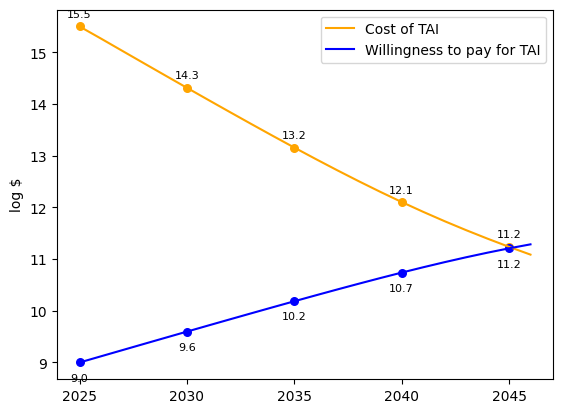



## SAMPLE RUN 2 ##

In this simulation:
* It takes 30.6 log FLOP (~4.0 nonillion) for transformative capabilities.
* Every 3.0 years algorithms get 2x better, with 2 log reductions possible.
* FLOP start at a cost of 17.6 log FLOP (~398.1 quadrillion) per 2025$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2025$USD.
* We are initially willing to pay 9.0 log 2025$USD (~995.9 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~240.0 billion 2025$USD).
* GDP grows at a rate of 1.03x per year.
---
2025 - TAI takes 30.6 logFLOP which costs 13.0 log 2025$USD to buy vs. WTP at 9.0 (buys 26.6 log FLOP or 26.6 2025-log-eFLOP)
2026 - TAI takes 30.5 logFLOP which costs 12.8 log 2025$USD to buy vs. WTP at 9.1 (buys 26.8 log FLOP or 26.9 2025-log-eFLOP)
2027 - TAI takes 30.4 logFLOP which costs 12.6 log 2025$USD to buy vs. WTP at 9.2 (buys 27.1 log FLOP or 27.3 2025-log-eFLOP)
2028 - TAI takes 30.3 logFLOP which costs 12.3 l

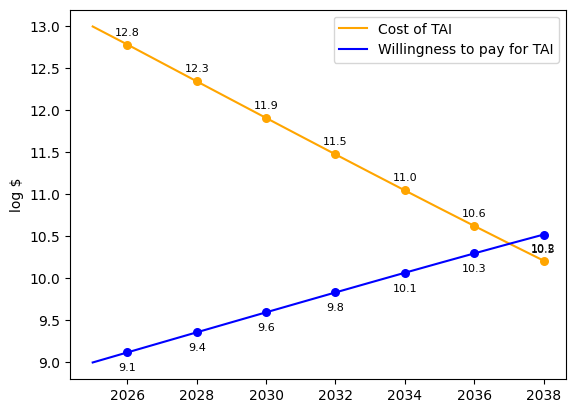



## SAMPLE RUN 3 ##

In this simulation:
* It takes 34.9 log FLOP (~79.4 decillion) for transformative capabilities.
* Every 2.0 years algorithms get 2x better, with 3 log reductions possible.
* FLOP start at a cost of 17.6 log FLOP (~398.1 quadrillion) per 2025$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2025$USD.
* We are initially willing to pay 9.0 log 2025$USD (~995.9 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~240.0 billion 2025$USD).
* GDP grows at a rate of 1.03x per year.
---
2025 - TAI takes 34.9 logFLOP which costs 17.3 log 2025$USD to buy vs. WTP at 9.0 (buys 26.6 log FLOP or 26.6 2025-log-eFLOP)
2026 - TAI takes 34.8 logFLOP which costs 17.0 log 2025$USD to buy vs. WTP at 9.1 (buys 26.8 log FLOP or 27.0 2025-log-eFLOP)
2027 - TAI takes 34.6 logFLOP which costs 16.8 log 2025$USD to buy vs. WTP at 9.2 (buys 27.1 log FLOP or 27.4 2025-log-eFLOP)
2028 - TAI takes 34.4 logFLOP which costs 16.5 

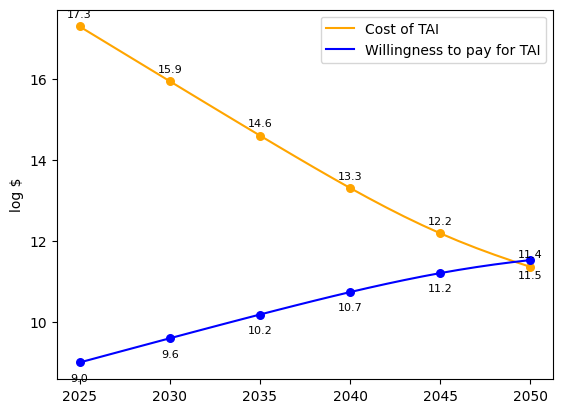



## RUN TIMELINES MODEL ##
Generating Bayes net with 5 cores...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:08<00:00, 1239.80it/s]


Shuffling data...
Writing data...
Waiting for other cores...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 608.12it/s]

...Collected!
Caching in-memory...
...Cached!
...Reducing
...Reduced!
...All done!

## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2028',
 '10%: 2031',
 '15%: 2033',
 '20%: 2036',
 '25%: 2039',
 '35%: 2044',
 '50%: 2051',
 '60%: 2062',
 '75%: 2081',
 '80%: >2125',
 '90%: >2125',
 '95%: >2125']


## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 3 years from now',
 '10%: 6 years from now',
 '15%: 8 years from now',
 '20%: 11 years from now',
 '25%: 14 years from now',
 '35%: 19 years from now',
 '50%: 26 years from now',
 '60%: 37 years from now',
 '75%: 56 years from now',
 '80%: >100 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now']
(Mean: 41 years from now)


## TAI ARRIVAL DATE BY BIN ##
This year: 2.2%
2026-2027: 2.2%
2028-2030: 5.4%
2030-2034: 8.8%
2035-2039: 10.4%
2040-2049: 20.6%
2050-2059: 10.9%
2060-2069: 11.1%
2070-2079: 5.2%
2080-2089: 1.4%
2090-2099: 0.6%
2100-2109: 0.6%
2110-2119: 0.4%
>2125: 22.1%


## TAI ARRIVAL DATE BY YEAR ##
By EOY 2025: 2.

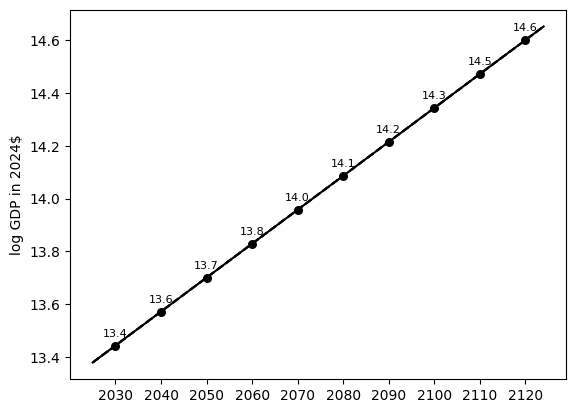

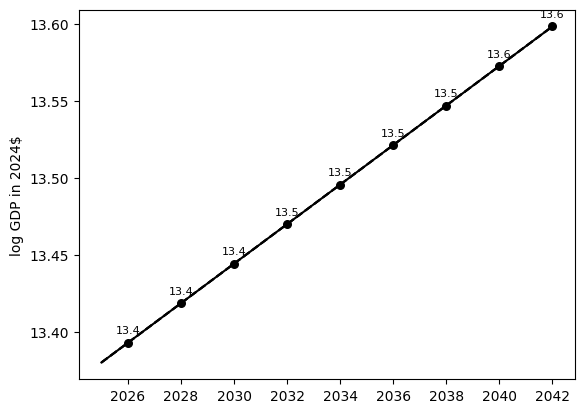



## Willingness to Pay Over Time ##
Year: 2025 - willingness log 2024$USD per year 9.0 (~995.9 million) 80% CI 9.0 (~995.9 million) - 9.0 (~995.9 million)
Year: 2026 - willingness log 2024$USD per year 9.1 (~1.3 billion) 80% CI 9.1 (~1.3 billion) - 9.1 (~1.3 billion)
Year: 2027 - willingness log 2024$USD per year 9.2 (~1.7 billion) 80% CI 9.2 (~1.7 billion) - 9.2 (~1.7 billion)
Year: 2028 - willingness log 2024$USD per year 9.4 (~2.3 billion) 80% CI 9.4 (~2.3 billion) - 9.4 (~2.3 billion)
Year: 2029 - willingness log 2024$USD per year 9.5 (~3.0 billion) 80% CI 9.5 (~3.0 billion) - 9.5 (~3.0 billion)
Year: 2030 - willingness log 2024$USD per year 9.6 (~3.9 billion) 80% CI 9.6 (~3.9 billion) - 9.6 (~3.9 billion)
Year: 2031 - willingness log 2024$USD per year 9.7 (~5.2 billion) 80% CI 9.7 (~5.2 billion) - 9.7 (~5.2 billion)
Year: 2032 - willingness log 2024$USD per year 9.8 (~6.8 billion) 80% CI 9.8 (~6.8 billion) - 9.8 (~6.8 billion)
Year: 2033 - willingness log 2024$USD per year 10.0 (

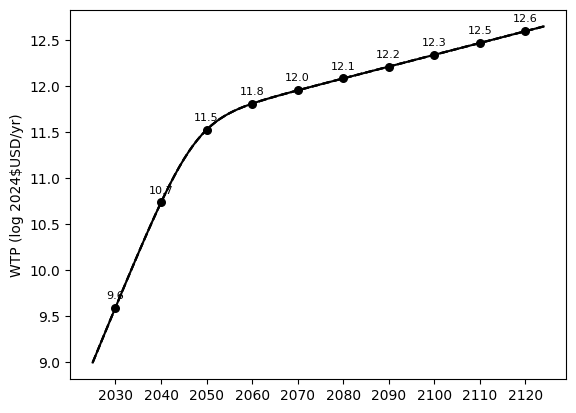

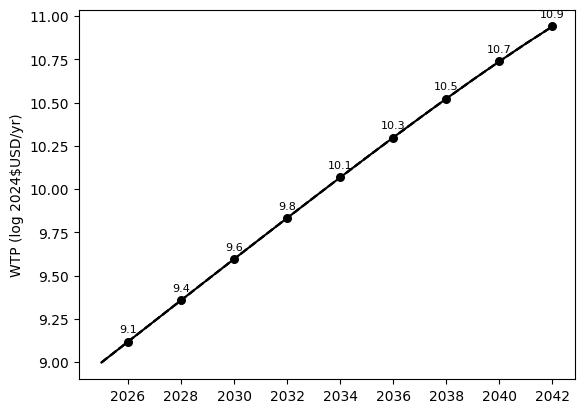



## Actual FLOP Needed to Make TAI (Given Algorithmic Progress) ##
Year: 2025 - logFLOP needed for TAI 35.1 (~125.9 decillion) 80% CI 29.7 (~501.2 octillion) - 40.8 (~63.1 million decillion)
Year: 2026 - logFLOP needed for TAI 35.0 (~89.1 decillion) 80% CI 29.6 (~416.2 octillion) - 40.6 (~44.6 million decillion)
Year: 2027 - logFLOP needed for TAI 34.8 (~63.1 decillion) 80% CI 29.5 (~342.3 octillion) - 40.5 (~31.6 million decillion)
Year: 2028 - logFLOP needed for TAI 34.6 (~44.6 decillion) 80% CI 29.4 (~281.7 octillion) - 40.3 (~22.3 million decillion)
Year: 2029 - logFLOP needed for TAI 34.5 (~31.6 decillion) 80% CI 29.4 (~232.0 octillion) - 40.2 (~15.8 million decillion)
Year: 2030 - logFLOP needed for TAI 34.3 (~22.4 decillion) 80% CI 29.3 (~191.2 octillion) - 40.0 (~11.2 million decillion)
Year: 2031 - logFLOP needed for TAI 34.2 (~15.9 decillion) 80% CI 29.2 (~157.8 octillion) - 39.9 (~7.9 million decillion)
Year: 2032 - logFLOP needed for TAI 34.1 (~11.3 decillion) 80% CI 29.1 

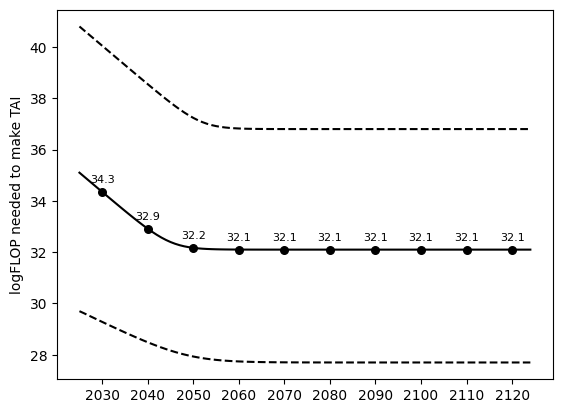

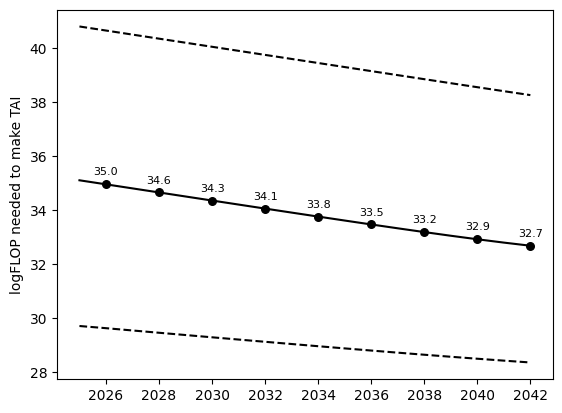



## FLOP per Dollar (Given Declining Costs) ##
Year: 2025 - logFLOP per 2024$1USD 17.6 (~398.1 quadrillion) 80% CI 17.6 (~398.1 quadrillion) - 17.6 (~398.1 quadrillion)
Year: 2026 - logFLOP per 2024$1USD 17.7 (~525.3 quadrillion) 80% CI 17.7 (~525.3 quadrillion) - 17.7 (~525.3 quadrillion)
Year: 2027 - logFLOP per 2024$1USD 17.8 (~693.1 quadrillion) 80% CI 17.8 (~693.1 quadrillion) - 17.8 (~693.1 quadrillion)
Year: 2028 - logFLOP per 2024$1USD 18.0 (~914.6 quadrillion) 80% CI 18.0 (~914.6 quadrillion) - 18.0 (~914.6 quadrillion)
Year: 2029 - logFLOP per 2024$1USD 18.1 (~1.2 quintillion) 80% CI 18.1 (~1.2 quintillion) - 18.1 (~1.2 quintillion)
Year: 2030 - logFLOP per 2024$1USD 18.2 (~1.6 quintillion) 80% CI 18.2 (~1.6 quintillion) - 18.2 (~1.6 quintillion)
Year: 2031 - logFLOP per 2024$1USD 18.3 (~2.1 quintillion) 80% CI 18.3 (~2.1 quintillion) - 18.3 (~2.1 quintillion)
Year: 2032 - logFLOP per 2024$1USD 18.4 (~2.8 quintillion) 80% CI 18.4 (~2.8 quintillion) - 18.4 (~2.8 quintillion)


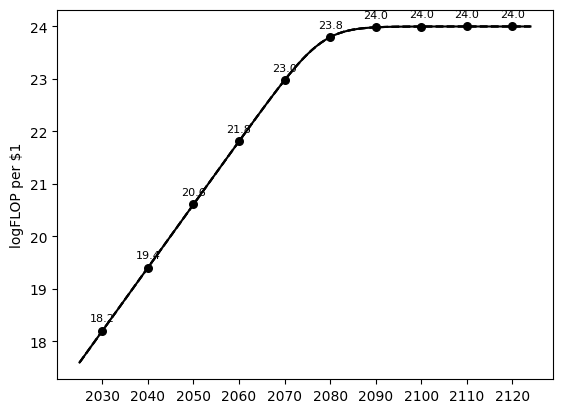

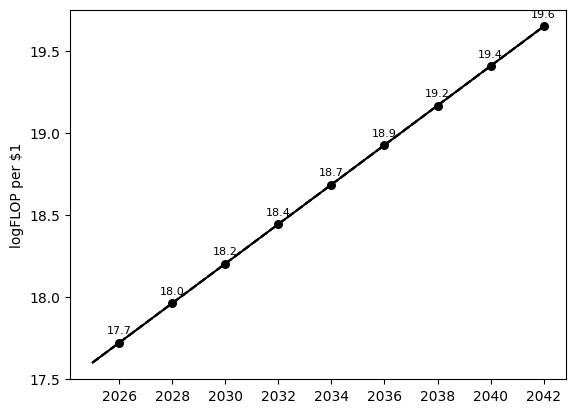



## Max Possible OOM Reduction in TAI FLOP Size ##
TAI log FLOP 20 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 21 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 22 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 23 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 24 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 25 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 26 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 27 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 28 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 29 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 30 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 31 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 32 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 33 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2

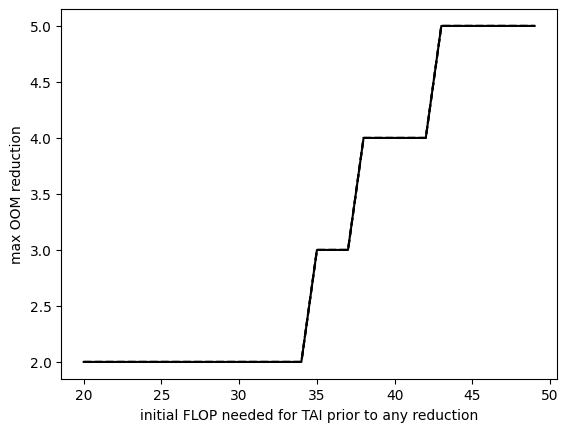



## Halving time (years) of compute requirements ##
TAI log FLOP 20 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 21 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 22 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 23 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 24 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 25 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 26 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 27 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 28 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 29 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 30 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 31 -> algo doubling rate 3.0yrs (80% CI: 3.0 to 3.0)
TAI log FLOP 32 -> algo doubling rate 2.5yrs (80% CI: 2.5 to 2.5)
TAI log FLOP 33 -> algo doubling rate 2.5yrs (80% CI: 2.5 to 2.5)
TAI log FLOP 34 -> algo

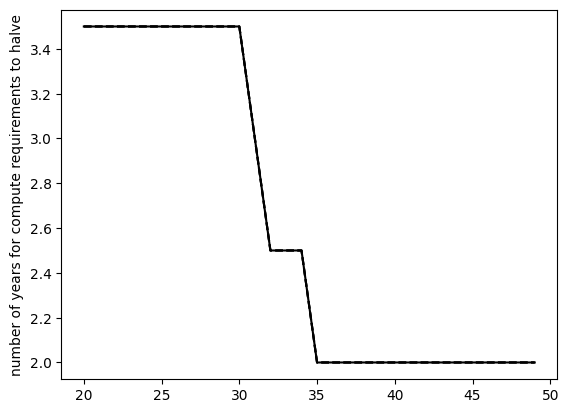



## Dollars Needed to Buy TAI (Given Algorithmic Progress and Decline in Cost per FLOP) ##
Year: 2025 - 17.5 log 2024$USD to buy TAI (~316.2 quadrillion) 80% CI 12.1 (~1.3 trillion) - 23.2 (~158.5 sextillion)
Year: 2026 - 17.2 log 2024$USD to buy TAI (~169.7 quadrillion) 80% CI 11.9 (~792.2 billion) - 22.9 (~84.9 sextillion)
Year: 2027 - 17.0 log 2024$USD to buy TAI (~91.0 quadrillion) 80% CI 11.7 (~493.8 billion) - 22.7 (~45.5 sextillion)
Year: 2028 - 16.7 log 2024$USD to buy TAI (~48.8 quadrillion) 80% CI 11.5 (~308.0 billion) - 22.4 (~24.4 sextillion)
Year: 2029 - 16.4 log 2024$USD to buy TAI (~26.2 quadrillion) 80% CI 11.3 (~192.2 billion) - 22.1 (~13.1 sextillion)
Year: 2030 - 16.1 log 2024$USD to buy TAI (~14.1 quadrillion) 80% CI 11.1 (~120.1 billion) - 21.8 (~7.0 sextillion)
Year: 2031 - 15.9 log 2024$USD to buy TAI (~7.5 quadrillion) 80% CI 10.9 (~75.1 billion) - 21.6 (~3.8 sextillion)
Year: 2032 - 15.6 log 2024$USD to buy TAI (~4.1 quadrillion) 80% CI 10.7 (~47.0 billion) - 

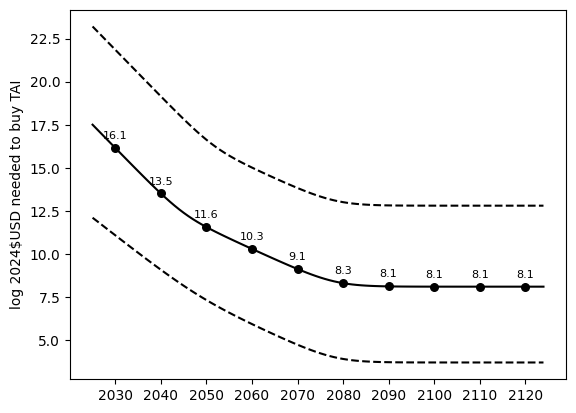

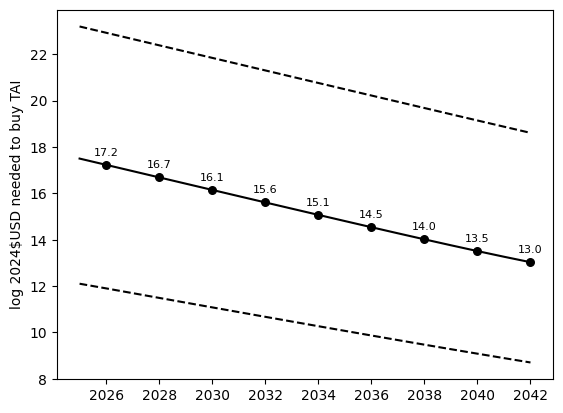



## Actual FLOP at Max Spend ##
Year: 2025 - max log FLOP 26.6 (~396.5 septillion) 80% CI 26.6 (~396.5 septillion) - 26.6 (~396.5 septillion)
Year: 2026 - max log FLOP 26.8 (~689.5 septillion) 80% CI 26.8 (~689.5 septillion) - 26.8 (~689.5 septillion)
Year: 2027 - max log FLOP 27.1 (~1.2 octillion) 80% CI 27.1 (~1.2 octillion) - 27.1 (~1.2 octillion)
Year: 2028 - max log FLOP 27.3 (~2.1 octillion) 80% CI 27.3 (~2.1 octillion) - 27.3 (~2.1 octillion)
Year: 2029 - max log FLOP 27.6 (~3.6 octillion) 80% CI 27.6 (~3.6 octillion) - 27.6 (~3.6 octillion)
Year: 2030 - max log FLOP 27.8 (~6.3 octillion) 80% CI 27.8 (~6.3 octillion) - 27.8 (~6.3 octillion)
Year: 2031 - max log FLOP 28.0 (~10.9 octillion) 80% CI 28.0 (~10.9 octillion) - 28.0 (~10.9 octillion)
Year: 2032 - max log FLOP 28.3 (~18.9 octillion) 80% CI 28.3 (~18.9 octillion) - 28.3 (~18.9 octillion)
Year: 2033 - max log FLOP 28.5 (~32.6 octillion) 80% CI 28.5 (~32.6 octillion) - 28.5 (~32.6 octillion)
Year: 2034 - max log FLOP 28.8 

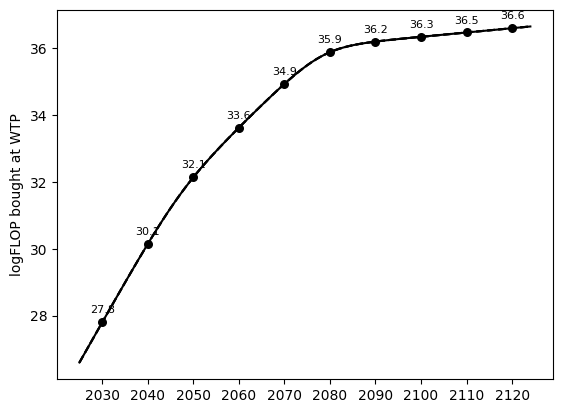

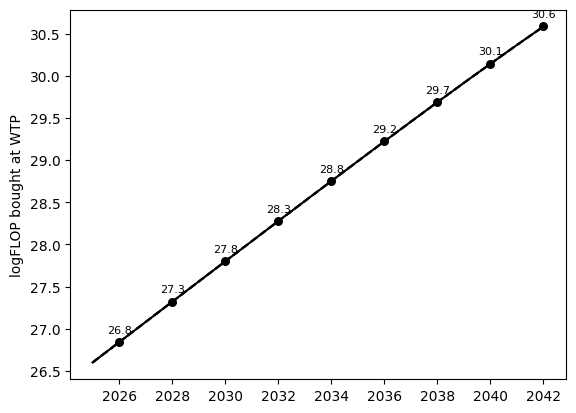



## Effective 2024-FLOP at Max Spend (given algorithmic progress and decline in $/FLOP) ##
Year: 2025 - max log effective 2024-FLOP 26.6 (~396.5 septillion) 80% CI 26.6 (~396.5 septillion) - 26.6 (~396.5 septillion)
Year: 2026 - max log effective 2024-FLOP 27.0 (~973.7 septillion) 80% CI 26.9 (~830.3 septillion) - 27.0 (~974.9 septillion)
Year: 2027 - max log effective 2024-FLOP 27.4 (~2.4 octillion) 80% CI 27.2 (~1.8 octillion) - 27.4 (~2.4 octillion)
Year: 2028 - max log effective 2024-FLOP 27.8 (~5.9 octillion) 80% CI 27.6 (~3.7 octillion) - 27.8 (~5.9 octillion)
Year: 2029 - max log effective 2024-FLOP 28.2 (~14.4 octillion) 80% CI 27.9 (~7.8 octillion) - 28.2 (~14.5 octillion)
Year: 2030 - max log effective 2024-FLOP 28.5 (~35.3 octillion) 80% CI 28.2 (~16.5 octillion) - 28.6 (~35.5 octillion)
Year: 2031 - max log effective 2024-FLOP 28.9 (~86.4 octillion) 80% CI 28.5 (~34.6 octillion) - 28.9 (~87.0 octillion)
Year: 2032 - max log effective 2024-FLOP 29.3 (~211.0 octillion) 80% C

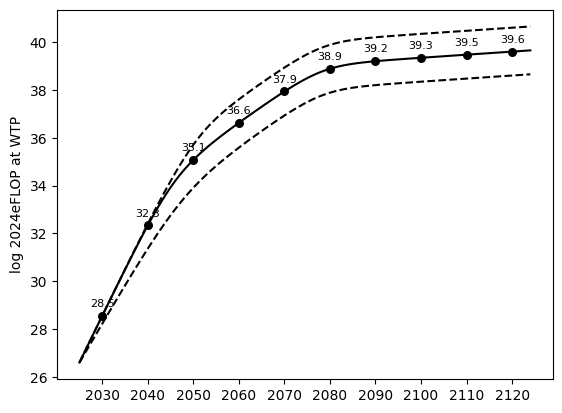

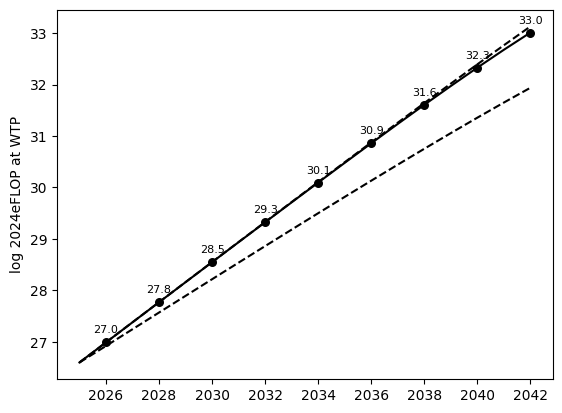


## TAI FLOP SIZE ##
{1: 25.8,
 5: 27.2,
 10: 28.0,
 20: 29.7,
 30: 31.7,
 40: 33.660000000000004,
 50: 35.1,
 60: 36.94,
 70: 38.6,
 80: 40.8,
 90: 45.81,
 95: 63.40999999999999,
 99: 68.101}


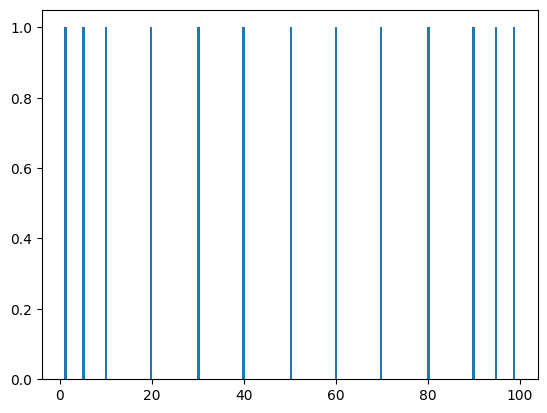



## MIN REDUCTION: 2 ##

## MAX REDUCTION: 5 ##

## MIN ALGO DOUBLING RATE: 2 ##

## MAX ALGO DOUBLING RATE: 3.5 ##

## INITIAL FLOP PER DOLLAR: 17.6 ##

## FLOP HALVING RATE: 2.5 ##

## MAX FLOP PER DOLLAR: 24 ##

## INITIAL PAY: 9 ##

## INITIAL GDP: 24000000000000 ##

## GDP GROWTH: 1.03 ##

## MAX GDP FRAC: 0.01 ##

## SPEND DOUBLING TIME: 2.5 ##



## Aggregate nonscaling delay probability ##
If TAI compute level achieved in 2024-2026... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2027-2030... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2031-2035... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2036-2040... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2041-2050... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2051-2060... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2061-2100... 0% chance of TAI nonscaling delay


## Aggregate nonscaling delay length

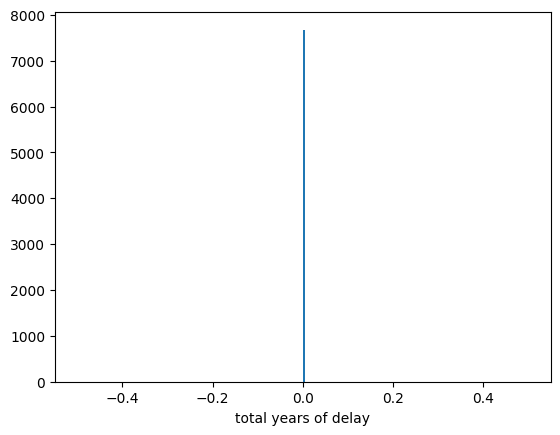

In [5]:
variables = VARIABLE_SETS['Cotra2020']
variables['RUNS'] = RUNS
variables['CURRENT_YEAR'] = CURRENT_YEAR
variables['MAX_YEAR'] = MAX_YEAR
run_timelines_model(variables, cores=5, runs=variables['RUNS'])

## Run Cotra 2022



## SAMPLE RUN 1 ##

In this simulation:
* It takes 65.9 log FLOP (~794.3 nonillion decillion) for transformative capabilities.
* Every 2 years algorithms get 2x better, with 5 log reductions possible.
* FLOP start at a cost of 18.6 log FLOP (~3.7 quintillion) per 2025$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2025$USD.
* We are initially willing to pay 9.0 log 2025$USD (~995.9 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~240.0 billion 2025$USD).
* GDP grows at a rate of 1.03x per year.
---
2025 - TAI takes 65.9 logFLOP which costs 47.3 log 2025$USD to buy vs. WTP at 9.0 (buys 27.6 log FLOP or 27.6 2025-log-eFLOP)
2026 - TAI takes 65.7 logFLOP which costs 47.1 log 2025$USD to buy vs. WTP at 9.1 (buys 27.8 log FLOP or 28.0 2025-log-eFLOP)
2027 - TAI takes 65.6 logFLOP which costs 46.8 log 2025$USD to buy vs. WTP at 9.2 (buys 28.0 log FLOP or 28.3 2025-log-eFLOP)
2028 - TAI takes 65.4 logFLOP which cost

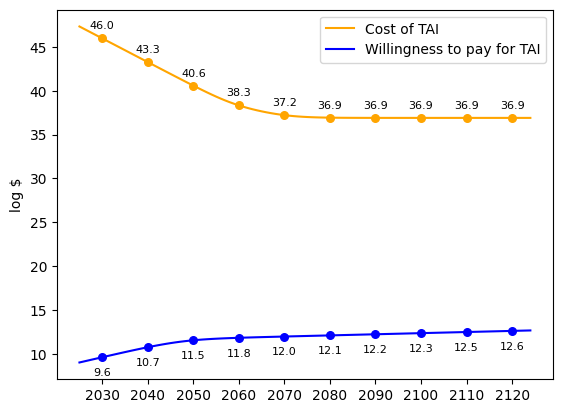



## SAMPLE RUN 2 ##

In this simulation:
* It takes 58.4 log FLOP (~25.1 septillion decillion) for transformative capabilities.
* Every 2 years algorithms get 2x better, with 5 log reductions possible.
* FLOP start at a cost of 18.6 log FLOP (~3.7 quintillion) per 2025$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2025$USD.
* We are initially willing to pay 9.0 log 2025$USD (~995.9 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~240.0 billion 2025$USD).
* GDP grows at a rate of 1.03x per year.
---
2025 - TAI takes 58.4 logFLOP which costs 39.8 log 2025$USD to buy vs. WTP at 9.0 (buys 27.6 log FLOP or 27.6 2025-log-eFLOP)
2026 - TAI takes 58.2 logFLOP which costs 39.6 log 2025$USD to buy vs. WTP at 9.1 (buys 27.8 log FLOP or 28.0 2025-log-eFLOP)
2027 - TAI takes 58.1 logFLOP which costs 39.3 log 2025$USD to buy vs. WTP at 9.2 (buys 28.0 log FLOP or 28.3 2025-log-eFLOP)
2028 - TAI takes 57.9 logFLOP which cost

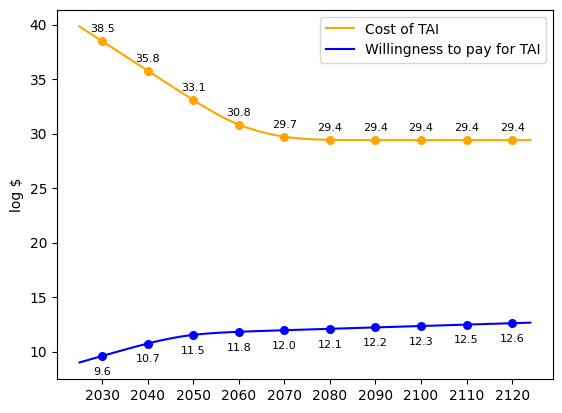



## SAMPLE RUN 3 ##

In this simulation:
* It takes 32.7 log FLOP (~501.2 nonillion) for transformative capabilities.
* Every 2.5 years algorithms get 2x better, with 2 log reductions possible.
* FLOP start at a cost of 18.6 log FLOP (~3.7 quintillion) per 2025$USD.
* Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1.0 septillion) per 2025$USD.
* We are initially willing to pay 9.0 log 2025$USD (~995.9 million).
* This doubles every 2.5 year to a max of 1.0% of GDP (initially ~240.0 billion 2025$USD).
* GDP grows at a rate of 1.03x per year.
---
2025 - TAI takes 32.7 logFLOP which costs 14.1 log 2025$USD to buy vs. WTP at 9.0 (buys 27.6 log FLOP or 27.6 2025-log-eFLOP)
2026 - TAI takes 32.6 logFLOP which costs 13.9 log 2025$USD to buy vs. WTP at 9.1 (buys 27.8 log FLOP or 27.9 2025-log-eFLOP)
2027 - TAI takes 32.5 logFLOP which costs 13.7 log 2025$USD to buy vs. WTP at 9.2 (buys 28.0 log FLOP or 28.3 2025-log-eFLOP)
2028 - TAI takes 32.3 logFLOP which costs 13.4 l

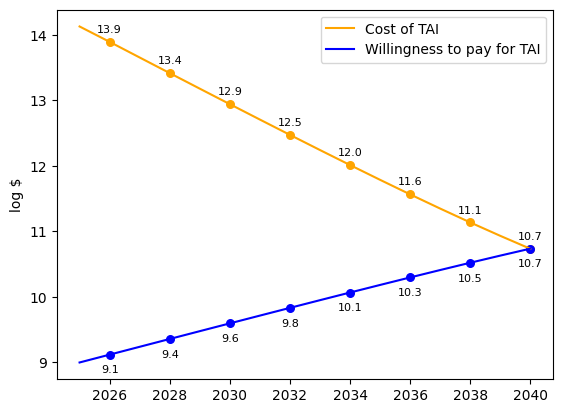



## RUN TIMELINES MODEL ##
Generating Bayes net with 5 cores...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1411.14it/s]


Shuffling data...
Writing data...
Waiting for other cores...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 402.80it/s]

...Collected!
Caching in-memory...
...Cached!
...Reducing
...Reduced!
...All done!

## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2025',
 '10%: 2025',
 '15%: 2027',
 '20%: 2028',
 '25%: 2030',
 '35%: 2035',
 '50%: 2041',
 '60%: 2045',
 '75%: 2058',
 '80%: 2063',
 '90%: >2125',
 '95%: >2125']


## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 0 years from now',
 '10%: 0 years from now',
 '15%: 2 years from now',
 '20%: 3 years from now',
 '25%: 5 years from now',
 '35%: 10 years from now',
 '50%: 16 years from now',
 '60%: 20 years from now',
 '75%: 33 years from now',
 '80%: 38 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now']
(Mean: 28 years from now)


## TAI ARRIVAL DATE BY BIN ##
This year: 11.7%
2026-2027: 6.1%
2028-2030: 7.9%
2030-2034: 10.7%
2035-2039: 12.8%
2040-2049: 20.6%
2050-2059: 9.0%
2060-2069: 6.1%
2070-2079: 1.9%
2080-2089: 0.4%
2090-2099: 0.6%
2100-2109: 0.2%
2110-2119: 0.4%
>2125: 13.7%


## TAI ARRIVAL DATE BY YEAR ##
By EOY 2025: 11.7%
B

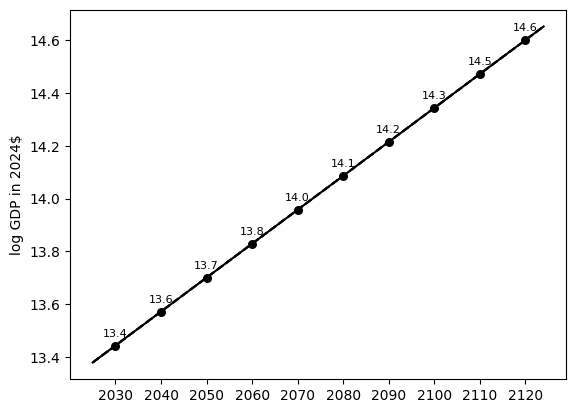

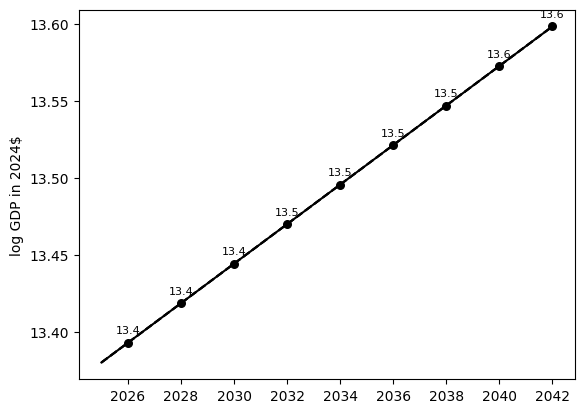



## Willingness to Pay Over Time ##
Year: 2025 - willingness log 2024$USD per year 9.0 (~995.9 million) 80% CI 9.0 (~995.9 million) - 9.0 (~995.9 million)
Year: 2026 - willingness log 2024$USD per year 9.1 (~1.3 billion) 80% CI 9.1 (~1.3 billion) - 9.1 (~1.3 billion)
Year: 2027 - willingness log 2024$USD per year 9.2 (~1.7 billion) 80% CI 9.2 (~1.7 billion) - 9.2 (~1.7 billion)
Year: 2028 - willingness log 2024$USD per year 9.4 (~2.3 billion) 80% CI 9.4 (~2.3 billion) - 9.4 (~2.3 billion)
Year: 2029 - willingness log 2024$USD per year 9.5 (~3.0 billion) 80% CI 9.5 (~3.0 billion) - 9.5 (~3.0 billion)
Year: 2030 - willingness log 2024$USD per year 9.6 (~3.9 billion) 80% CI 9.6 (~3.9 billion) - 9.6 (~3.9 billion)
Year: 2031 - willingness log 2024$USD per year 9.7 (~5.2 billion) 80% CI 9.7 (~5.2 billion) - 9.7 (~5.2 billion)
Year: 2032 - willingness log 2024$USD per year 9.8 (~6.8 billion) 80% CI 9.8 (~6.8 billion) - 9.8 (~6.8 billion)
Year: 2033 - willingness log 2024$USD per year 10.0 (

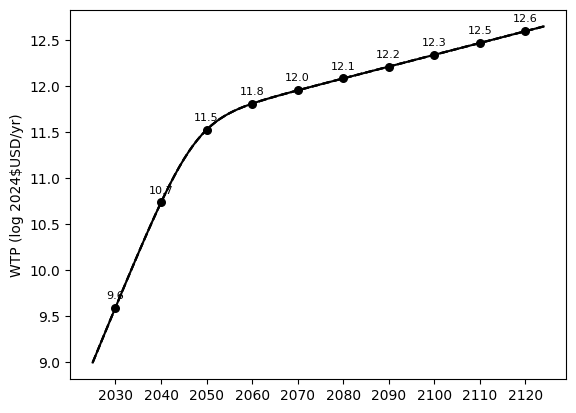

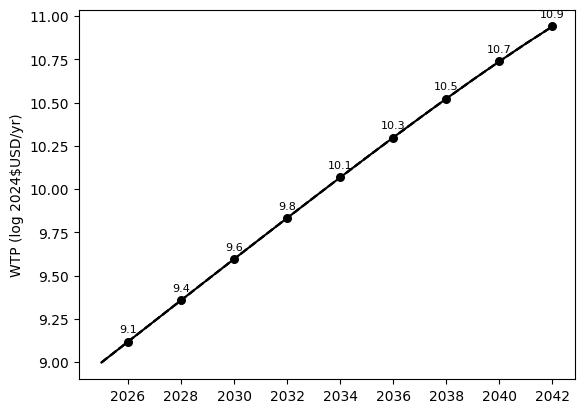



## Actual FLOP Needed to Make TAI (Given Algorithmic Progress) ##
Year: 2025 - logFLOP needed for TAI 33.0 (~1000.0 nonillion) 80% CI 28.4 (~25.1 octillion) - 38.5 (~316.2 thousand decillion)
Year: 2026 - logFLOP needed for TAI 32.9 (~767.9 nonillion) 80% CI 28.3 (~20.9 octillion) - 38.3 (~223.6 thousand decillion)
Year: 2027 - logFLOP needed for TAI 32.8 (~584.3 nonillion) 80% CI 28.2 (~17.2 octillion) - 38.2 (~158.1 thousand decillion)
Year: 2028 - logFLOP needed for TAI 32.6 (~445.3 nonillion) 80% CI 28.1 (~14.1 octillion) - 38.0 (~111.8 thousand decillion)
Year: 2029 - logFLOP needed for TAI 32.5 (~339.9 nonillion) 80% CI 28.1 (~11.6 octillion) - 37.9 (~79.1 thousand decillion)
Year: 2030 - logFLOP needed for TAI 32.4 (~260.0 nonillion) 80% CI 28.0 (~9.6 octillion) - 37.7 (~55.9 thousand decillion)
Year: 2031 - logFLOP needed for TAI 32.3 (~199.5 nonillion) 80% CI 27.9 (~7.9 octillion) - 37.6 (~39.6 thousand decillion)
Year: 2032 - logFLOP needed for TAI 32.2 (~153.6 nonillion) 8

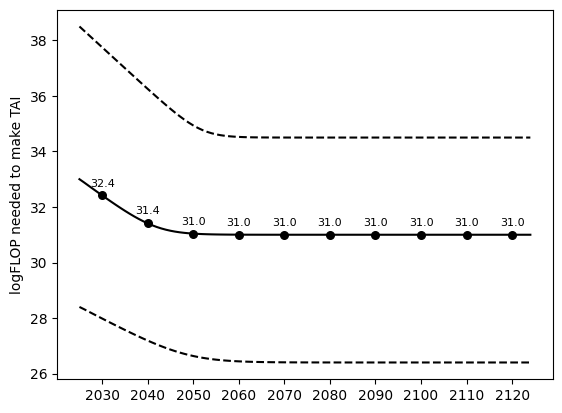

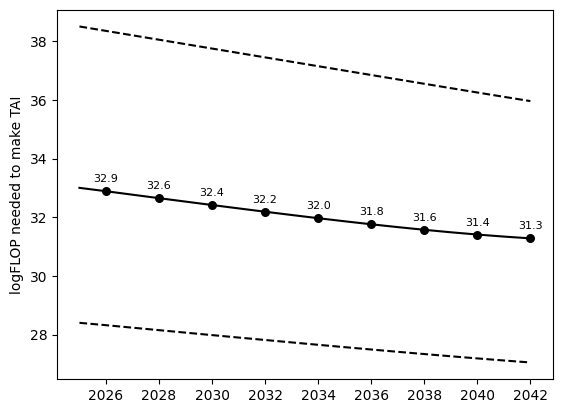



## FLOP per Dollar (Given Declining Costs) ##
Year: 2025 - logFLOP per 2024$1USD 18.6 (~3.7 quintillion) 80% CI 18.6 (~3.7 quintillion) - 18.6 (~3.7 quintillion)
Year: 2026 - logFLOP per 2024$1USD 18.7 (~4.9 quintillion) 80% CI 18.7 (~4.9 quintillion) - 18.7 (~4.9 quintillion)
Year: 2027 - logFLOP per 2024$1USD 18.8 (~6.5 quintillion) 80% CI 18.8 (~6.5 quintillion) - 18.8 (~6.5 quintillion)
Year: 2028 - logFLOP per 2024$1USD 18.9 (~8.5 quintillion) 80% CI 18.9 (~8.5 quintillion) - 18.9 (~8.5 quintillion)
Year: 2029 - logFLOP per 2024$1USD 19.1 (~11.3 quintillion) 80% CI 19.1 (~11.3 quintillion) - 19.1 (~11.3 quintillion)
Year: 2030 - logFLOP per 2024$1USD 19.2 (~14.9 quintillion) 80% CI 19.2 (~14.9 quintillion) - 19.2 (~14.9 quintillion)
Year: 2031 - logFLOP per 2024$1USD 19.3 (~19.6 quintillion) 80% CI 19.3 (~19.6 quintillion) - 19.3 (~19.6 quintillion)
Year: 2032 - logFLOP per 2024$1USD 19.4 (~25.9 quintillion) 80% CI 19.4 (~25.9 quintillion) - 19.4 (~25.9 quintillion)
Year: 2033 -

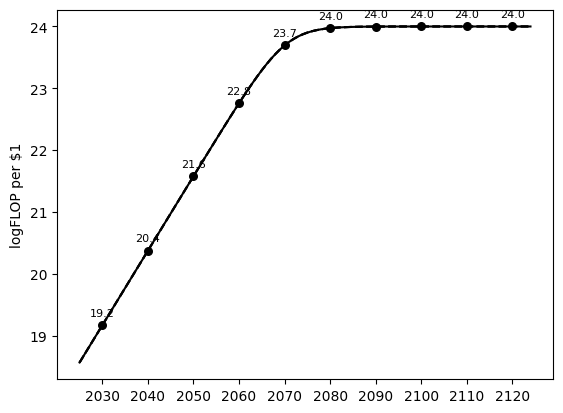

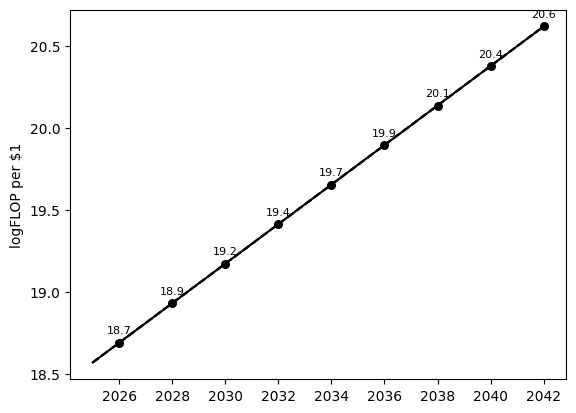



## Max Possible OOM Reduction in TAI FLOP Size ##
TAI log FLOP 20 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 21 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 22 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 23 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 24 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 25 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 26 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 27 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 28 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 29 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 30 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 31 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 32 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2.0)
TAI log FLOP 33 -> 2.0 OOM reductions possible (80% CI: 2.0 to 2

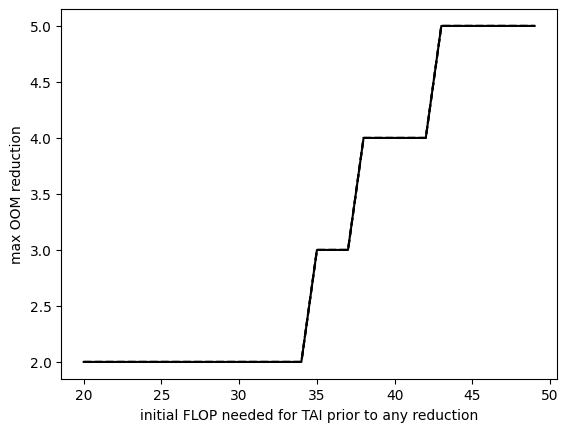



## Halving time (years) of compute requirements ##
TAI log FLOP 20 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 21 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 22 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 23 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 24 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 25 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 26 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 27 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 28 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 29 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 30 -> algo doubling rate 3.5yrs (80% CI: 3.5 to 3.5)
TAI log FLOP 31 -> algo doubling rate 3.0yrs (80% CI: 3.0 to 3.0)
TAI log FLOP 32 -> algo doubling rate 2.5yrs (80% CI: 2.5 to 2.5)
TAI log FLOP 33 -> algo doubling rate 2.5yrs (80% CI: 2.5 to 2.5)
TAI log FLOP 34 -> algo

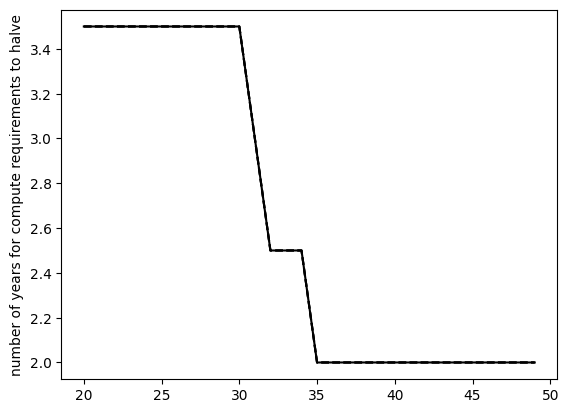



## Dollars Needed to Buy TAI (Given Algorithmic Progress and Decline in Cost per FLOP) ##
Year: 2025 - 14.4 log 2024$USD to buy TAI (~269.2 trillion) 80% CI 9.8 (~6.8 billion) - 19.9 (~85.1 quintillion)
Year: 2026 - 14.2 log 2024$USD to buy TAI (~156.6 trillion) 80% CI 9.6 (~4.3 billion) - 19.7 (~45.6 quintillion)
Year: 2027 - 14.0 log 2024$USD to buy TAI (~90.3 trillion) 80% CI 9.4 (~2.7 billion) - 19.4 (~24.4 quintillion)
Year: 2028 - 13.7 log 2024$USD to buy TAI (~52.2 trillion) 80% CI 9.2 (~1.7 billion) - 19.1 (~13.1 quintillion)
Year: 2029 - 13.5 log 2024$USD to buy TAI (~30.2 trillion) 80% CI 9.0 (~1.0 billion) - 18.8 (~7.0 quintillion)
Year: 2030 - 13.2 log 2024$USD to buy TAI (~17.5 trillion) 80% CI 8.8 (~644.8 million) - 18.6 (~3.8 quintillion)
Year: 2031 - 13.0 log 2024$USD to buy TAI (~10.2 trillion) 80% CI 8.6 (~403.2 million) - 18.3 (~2.0 quintillion)
Year: 2032 - 12.8 log 2024$USD to buy TAI (~5.9 trillion) 80% CI 8.4 (~252.4 million) - 18.0 (~1.1 quintillion)
Year: 203

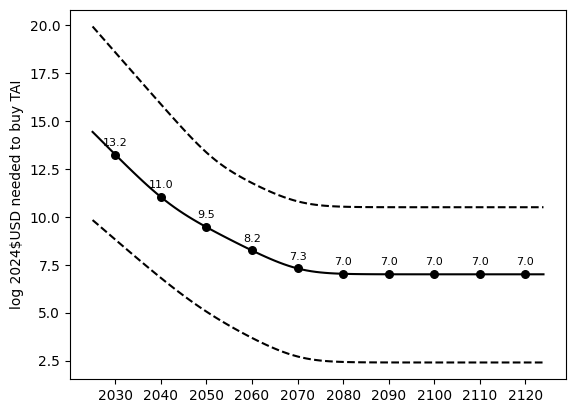

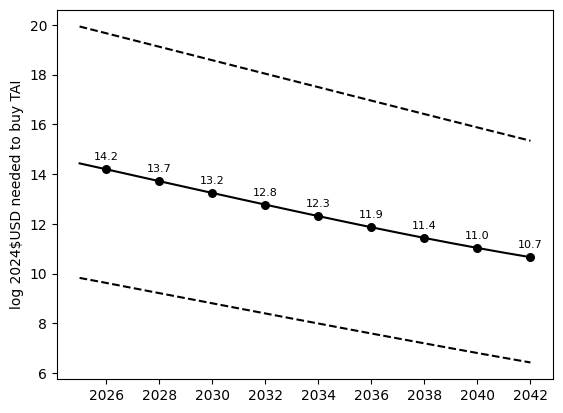



## Actual FLOP at Max Spend ##
Year: 2025 - max log FLOP 27.6 (~3.7 octillion) 80% CI 27.6 (~3.7 octillion) - 27.6 (~3.7 octillion)
Year: 2026 - max log FLOP 27.8 (~6.4 octillion) 80% CI 27.8 (~6.4 octillion) - 27.8 (~6.4 octillion)
Year: 2027 - max log FLOP 28.0 (~11.2 octillion) 80% CI 28.0 (~11.2 octillion) - 28.0 (~11.2 octillion)
Year: 2028 - max log FLOP 28.3 (~19.4 octillion) 80% CI 28.3 (~19.4 octillion) - 28.3 (~19.4 octillion)
Year: 2029 - max log FLOP 28.5 (~33.8 octillion) 80% CI 28.5 (~33.8 octillion) - 28.5 (~33.8 octillion)
Year: 2030 - max log FLOP 28.8 (~58.6 octillion) 80% CI 28.8 (~58.6 octillion) - 28.8 (~58.6 octillion)
Year: 2031 - max log FLOP 29.0 (~101.6 octillion) 80% CI 29.0 (~101.6 octillion) - 29.0 (~101.6 octillion)
Year: 2032 - max log FLOP 29.2 (~176.0 octillion) 80% CI 29.2 (~176.0 octillion) - 29.2 (~176.0 octillion)
Year: 2033 - max log FLOP 29.5 (~304.5 octillion) 80% CI 29.5 (~304.5 octillion) - 29.5 (~304.5 octillion)
Year: 2034 - max log FLOP 29

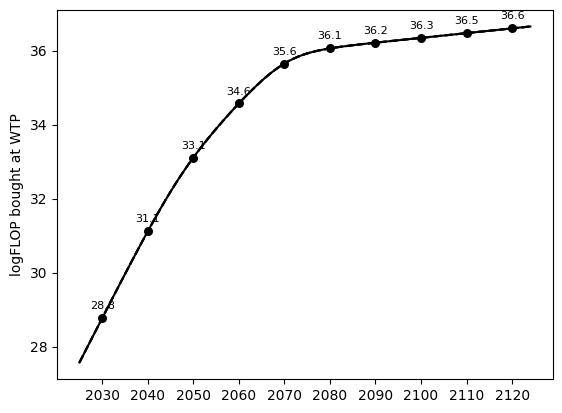

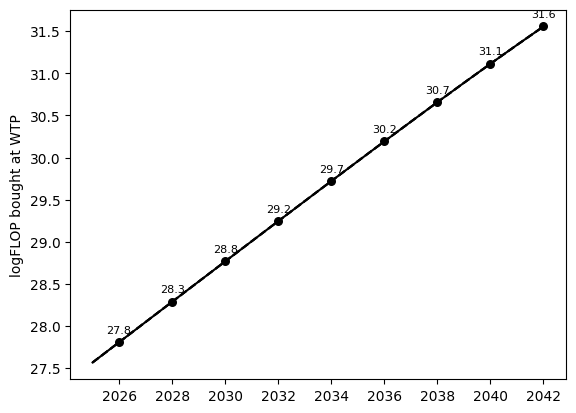



## Effective 2024-FLOP at Max Spend (given algorithmic progress and decline in $/FLOP) ##
Year: 2025 - max log effective 2024-FLOP 27.6 (~3.7 octillion) 80% CI 27.6 (~3.7 octillion) - 27.6 (~3.7 octillion)
Year: 2026 - max log effective 2024-FLOP 27.9 (~8.4 octillion) 80% CI 27.9 (~7.7 octillion) - 28.0 (~9.1 octillion)
Year: 2027 - max log effective 2024-FLOP 28.3 (~19.1 octillion) 80% CI 28.2 (~16.4 octillion) - 28.3 (~22.4 octillion)
Year: 2028 - max log effective 2024-FLOP 28.6 (~43.7 octillion) 80% CI 28.5 (~34.6 octillion) - 28.7 (~55.0 octillion)
Year: 2029 - max log effective 2024-FLOP 29.0 (~99.3 octillion) 80% CI 28.9 (~72.9 octillion) - 29.1 (~135.0 octillion)
Year: 2030 - max log effective 2024-FLOP 29.4 (~225.4 octillion) 80% CI 29.2 (~153.6 octillion) - 29.5 (~331.3 octillion)
Year: 2031 - max log effective 2024-FLOP 29.7 (~509.5 octillion) 80% CI 29.5 (~322.9 octillion) - 29.9 (~812.4 octillion)
Year: 2032 - max log effective 2024-FLOP 30.1 (~1.1 nonillion) 80% CI 29.8

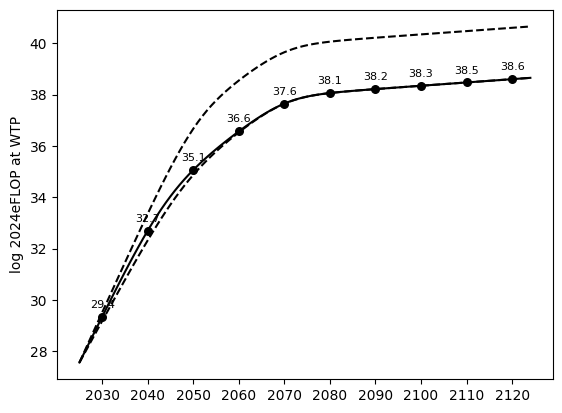

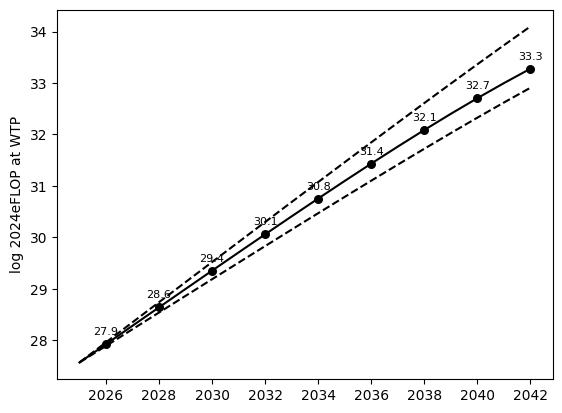


## TAI FLOP SIZE ##
{1: 25.398999999999997,
 5: 26.6,
 10: 27.3,
 20: 28.4,
 30: 30.1,
 40: 31.6,
 50: 33.0,
 60: 34.54,
 70: 36.4,
 80: 38.5,
 90: 42.120000000000005,
 95: 48.67499999999993,
 99: 68.202}


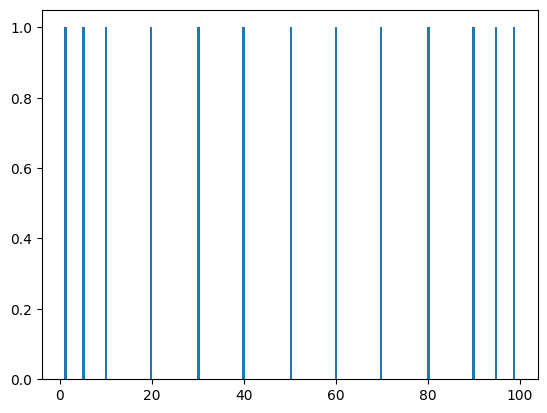



## MIN REDUCTION: 2 ##

## MAX REDUCTION: 5 ##

## MIN ALGO DOUBLING RATE: 2 ##

## MAX ALGO DOUBLING RATE: 3.5 ##

## INITIAL FLOP PER DOLLAR: 18.57 ##

## FLOP HALVING RATE: 2.5 ##

## MAX FLOP PER DOLLAR: 24 ##

## INITIAL PAY: 9 ##

## INITIAL GDP: 24000000000000 ##

## GDP GROWTH: 1.03 ##

## MAX GDP FRAC: 0.01 ##

## SPEND DOUBLING TIME: 2.5 ##



## Aggregate nonscaling delay probability ##
If TAI compute level achieved in 2024-2026... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2027-2030... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2031-2035... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2036-2040... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2041-2050... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2051-2060... 0% chance of TAI nonscaling delay
If TAI compute level achieved in 2061-2100... 0% chance of TAI nonscaling delay


## Aggregate nonscaling delay lengt

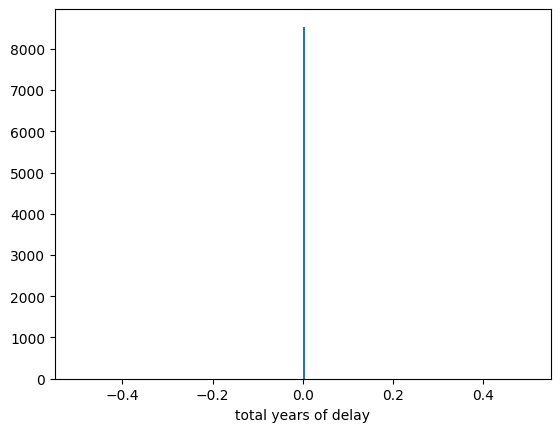

In [6]:
variables = VARIABLE_SETS['Cotra2022']
variables['RUNS'] = RUNS
variables['CURRENT_YEAR'] = CURRENT_YEAR
variables['MAX_YEAR'] = MAX_YEAR
run_timelines_model(variables, cores=5, runs=RUNS)

In [7]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2024-03-27 14:29:31.989418
